<a href="https://colab.research.google.com/github/Kiran-Venkatesh/KV/blob/master/Task_2_Kiran_Gyan_Ship_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np

from keras.layers import Dense,Flatten,MaxPooling2D,Convolution2D,Dropout,GlobalAveragePooling2D
from keras.models import Sequential,load_model
from keras.optimizers import adam_v2
from keras.callbacks import EarlyStopping

from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model



import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
Class_names = []
mypath = '/content/drive/MyDrive/Colab Notebooks/Gyan Data datasets/ships'
for (dirpath, dirnames, filenames) in os.walk(mypath):
    Class_names.extend(dirnames)
    break

In [ ]:
Class_names

['cruise', 'sub', 'air_car', 'container', 'tanker']

In [ ]:
from os import walk
directory=mypath
categories=Class_names
Count=[]
for category in categories:
  path = os.path.join(directory,category)
  count= 0
  for img in os.listdir(path):
    count+=1
  Count.append(count)

In [ ]:
for i in range(len(Count)):
  print(categories[i],Count[i])

cruise 100
sub 100
air_car 100
container 100
tanker 100


In [ ]:
X = []
Y = []
i=-1
df = pd.DataFrame()
for category in categories:
  path = os.path.join(directory,category)
  i+=1
  for img in os.listdir(path):
    if img.endswith(('jpg', 'png','jpeg','JPG','PNG','JPEG')):
      image = (cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE))
      image = cv2.resize(image,(224,224))                     
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)           
      X.append(image)
      Y.append(category)
      sample_image = expand_dims(image, 0)
      #Image Data Augmentation to avoid overfit and also increase in training data
      datagenertor = ImageDataGenerator(brightness_range=[0.1,1.0],zoom_range=0.2)
      iterator = datagenertor.flow(sample_image, batch_size=4)
      for b in range(4):
        batch = iterator.next()
        image = batch[0].astype('uint8')        
        X.append(cv2.resize(image,(224,224)))
        Y.append(category)             

In [ ]:
print("Total number of Records",len(Y))
for i in categories:
  print("Total number of",i," ",Y.count(i))

Total number of Records 2500
Total number of cruise   500
Total number of sub   500
Total number of air_car   500
Total number of container   500
Total number of tanker   500


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of the Full dataset classes')

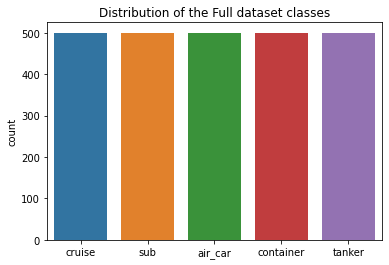

In [ ]:
sns.countplot(Y)
plt.title("Distribution of the Full dataset classes")

In [ ]:
from keras.utils import np_utils
import pickle
X = np.array(X)
print(Y)
le_ = LabelEncoder()
Y = (le_.fit_transform(Y))
print(Y)
output = open('/content/drive/MyDrive/Colab Notebooks/Gyan Data datasets/encoder_ship.pkl', 'wb')
pickle.dump(le_, output)
output.close()
Y= np_utils.to_categorical(Y)
print(Y)

['cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise', 'cruise',

In [ ]:
from keras.applications.vgg16  import VGG16
from keras.models import Sequential, Model


img_height,img_width = 224,224          ## default input size
num_classes = len(categories)                        ## Total Classes

base_model = VGG16(weights='imagenet', include_top=False, input_shape= (img_height,img_width,3))

# Final dense layers
x = base_model.output           ## getting features
x = GlobalAveragePooling2D()(x) ## Average Pooling
x = Dropout(0.3)(x)             ## Dropout

# Final softmax layer
predictions = Dense(num_classes, activation= 'softmax')(x)  
model = Model(inputs = base_model.input, outputs = predictions)


# compiling the model
adam = adam_v2.Adam(lr=1e-5, decay=1e-6)
model.compile(adam, 'categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,Y,stratify=Y,test_size=0.3)

In [ ]:
print(X_train.shape,y_train.shape)

(1750, 224, 224, 3) (1750, 5)


In [ ]:
print(X_val.shape,y_val.shape)

(750, 224, 224, 3) (750, 5)


In [ ]:
early_stopping = EarlyStopping(patience=15, verbose=1,restore_best_weights=True)

In [ ]:
from keras.callbacks import ModelCheckpoint

filepath="/content/drive/MyDrive/Colab Notebooks/Gyan Data datasets/ships_classify_VGG.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
history = model.fit(X_train, y_train,batch_size=25,epochs=50, callbacks=[checkpoint,early_stopping], validation_data=(X_val,y_val))

Epoch 1/50
70/70 [==============================] - ETA: 0s - loss: 1.7628 - accuracy: 0.4240
Epoch 1: val_accuracy improved from -inf to 0.81333, saving model to /content/drive/MyDrive/Colab Notebooks/Gyan Data datasets/ships_classify_VGG.h5
70/70 [==============================] - 61s 857ms/step - loss: 1.7628 - accuracy: 0.4240 - val_loss: 0.7100 - val_accuracy: 0.8133
Epoch 2/50
70/70 [==============================] - ETA: 0s - loss: 0.5166 - accuracy: 0.8560
Epoch 2: val_accuracy improved from 0.81333 to 0.96133, saving model to /content/drive/MyDrive/Colab Notebooks/Gyan Data datasets/ships_classify_VGG.h5
70/70 [==============================] - 63s 896ms/step - loss: 0.5166 - accuracy: 0.8560 - val_loss: 0.2099 - val_accuracy: 0.9613
Epoch 3/50
70/70 [==============================] - ETA: 0s - loss: 0.1974 - accuracy: 0.9497
Epoch 3: val_accuracy improved from 0.96133 to 0.98667, saving model to /content/drive/MyDrive/Colab Notebooks/Gyan Data datasets/ships_classify_VGG.h5
7

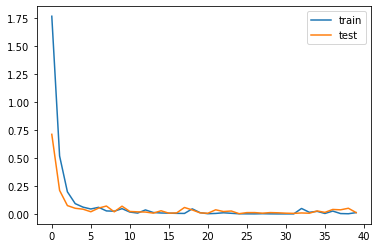

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

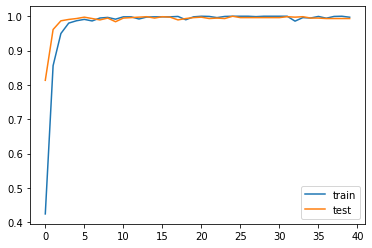

In [ ]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

In [ ]:
loss, acc = model.evaluate(X_val,y_val,verbose=0)
print("The Validation or Test accuracy is:",acc)

The Validation or Test accuracy is: 1.0


In [ ]:
preds=model.predict(X_val, verbose=1)
y_pred = [list(np.where(i == np.amax(i))[0])[0] for i in preds]
y_test =[list(np.where(i == np.amax(i))[0])[0] for i in y_val]

24/24 [==============================] - 6s 274ms/step


In [ ]:
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[150   0   0   0   0]
 [  0 150   0   0   0]
 [  0   0 150   0   0]
 [  0   0   0 150   0]
 [  0   0   0   0 150]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00       150
           3       1.00      1.00      1.00       150
           4       1.00      1.00      1.00       150

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

